# Portal Design

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("D:\PGDBA Backup\ISI\AB-Inference\Assignments\Datasets\Default vs Challenger.xlsx")

In [3]:
df.head()

,Date,Number Visited Default,Number Visited Challenger,Conversion Default,Conversion Challenger
0,2019-05-15,4663,4699,12,11
1,2019-05-16,7139,6974,9,31
2,2019-05-17,7520,7683,17,24
3,2019-05-18,6833,6718,18,23
4,2019-05-19,6152,6227,11,24


In [4]:
df.describe()

,Number Visited Default,Number Visited Challenger,Conversion Default,Conversion Challenger
count,28.000000,28.000000,28.000000,28.000000
mean,5975.964286,7432.035714,12.785714,23.535714
std,4567.715480,996.150274,15.107901,4.574342
min,-7928.000000,4699.000000,-27.000000,11.000000
25%,6515.250000,6656.750000,12.750000,20.750000
50%,7543.500000,7746.000000,17.500000,24.000000
75%,8110.500000,8197.250000,21.000000,26.250000
max,8669.000000,8757.000000,30.000000,31.000000


In [5]:
df_prop = df.copy()


df_prop["Number Visited Default"]=df_prop["Number Visited Default"].abs();
df_prop["Number Visited Challenger"]=df_prop["Number Visited Challenger"].abs();
df_prop["Conversion Default"]=df_prop["Conversion Default"].abs();
df_prop["Conversion Challenger"]=df_prop["Conversion Challenger"].abs();


df_prop["Proportion Conversion Default"] = df_prop["Conversion Default"]/df_prop["Number Visited Default"]
df_prop["Proportion Conversion Challenger"] = df_prop["Conversion Challenger"]/df_prop["Number Visited Challenger"]

In [6]:
df_prop.head()

,Date,Number Visited Default,Number Visited Challenger,Conversion Default,Conversion Challenger,Proportion Conversion Default,Proportion Conversion Challenger
0,2019-05-15,4663,4699,12,11,0.002573,0.002341
1,2019-05-16,7139,6974,9,31,0.001261,0.004445
2,2019-05-17,7520,7683,17,24,0.002261,0.003124
3,2019-05-18,6833,6718,18,23,0.002634,0.003424
4,2019-05-19,6152,6227,11,24,0.001788,0.003854


In [7]:
df_prop.describe()

,Number Visited Default,Number Visited Challenger,Conversion Default,Conversion Challenger,Proportion Conversion Default,Proportion Conversion Challenger
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,7412.250000,7432.035714,18.928571,23.535714,0.002561,0.003195
std,960.482927,996.150274,5.120247,4.574342,0.000622,0.000653
min,4663.000000,4699.000000,9.000000,11.000000,0.001261,0.002055
25%,6761.750000,6656.750000,15.750000,20.750000,0.002077,0.002706
50%,7691.500000,7746.000000,19.000000,24.000000,0.002666,0.003197
75%,8110.500000,8197.250000,21.250000,26.250000,0.002899,0.003519
max,8669.000000,8757.000000,30.000000,31.000000,0.003636,0.004596


In [8]:
default_converted = df_prop["Conversion Default"].sum()
challenger_converted = df_prop["Conversion Challenger"].sum()

default_total = df_prop["Number Visited Default"].sum()
challenger_total= df_prop["Number Visited Challenger"].sum()

default_not_converted = default_total - default_converted
challenger_not_converted = challenger_total - challenger_converted

In [9]:
print("default_converted:", default_converted)
print("challenger_converted:", challenger_converted)
print("default_not_converted:", default_not_converted)
print("challenger_not_converted:", challenger_not_converted)
print("default_total:", default_total)
print("challenger_total:", challenger_total)


default_converted: 530
challenger_converted: 659
default_not_converted: 207013
challenger_not_converted: 207438
default_total: 207543
challenger_total: 208097


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Proption converted')]

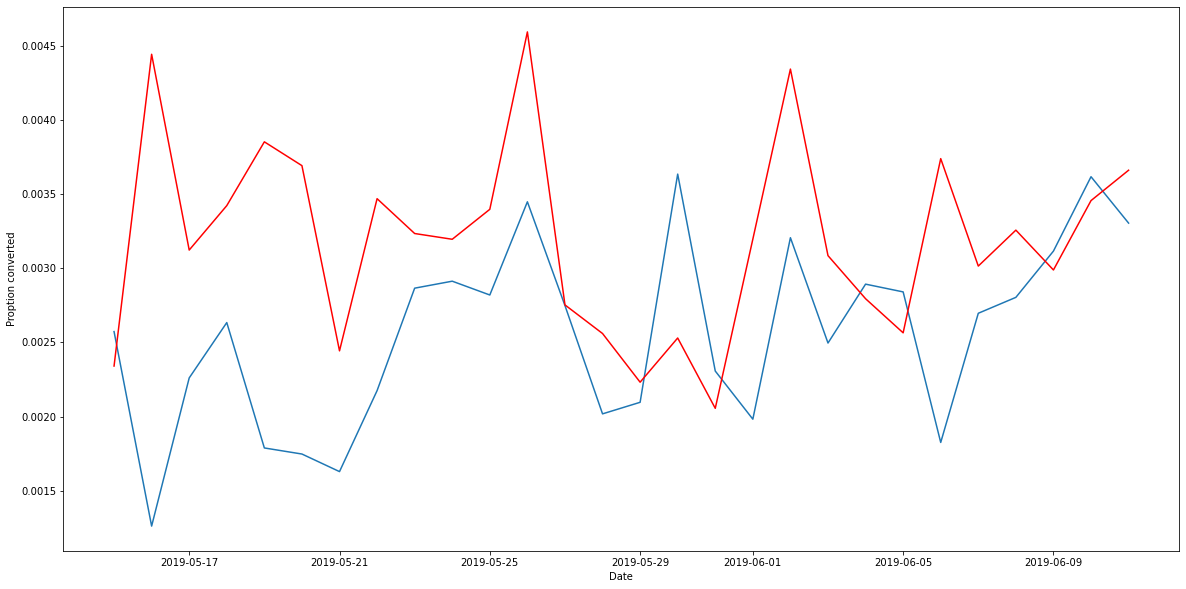

In [10]:
plt.figure(figsize=(20,10))

sns.lineplot(data=df_prop, x="Date", y= "Proportion Conversion Default")
sns.lineplot(data=df_prop, x="Date", y= "Proportion Conversion Challenger", color="red").set(xlabel="Date", ylabel = "Proption converted")

In [11]:
# No observable trend 
# Stationery data

<AxesSubplot:ylabel='Proportion Conversion Default'>

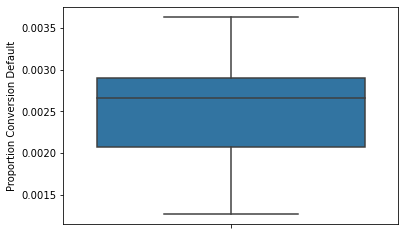

In [12]:
sns.boxplot(data = df_prop, y="Proportion Conversion Default")

<AxesSubplot:ylabel='Proportion Conversion Challenger'>

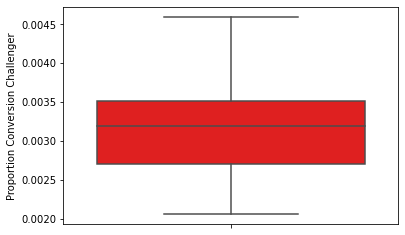

In [13]:
sns.boxplot(data = df_prop, y="Proportion Conversion Challenger", color = "red")

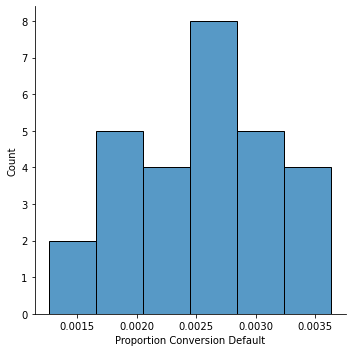

In [14]:
sns.displot(data=df_prop, x="Proportion Conversion Default")

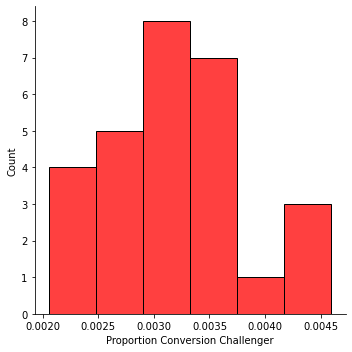

In [15]:
sns.displot(data=df_prop, x="Proportion Conversion Challenger", color="red")

In [16]:
# x  = df_prop["Proportion Conversion Default"] + df_prop["Proportion Conversion Challenger"]

x = df_prop.loc[:,"Proportion Conversion Default"].values
y = df_prop.loc[:,"Proportion Conversion Challenger"].values

z= np.concatenate((x, y))

print(z)

[0.00257345 0.00126068 0.00226064 0.00263427 0.00178804 0.00174708
 0.00162846 0.00217503 0.0028665  0.00291361 0.00282043 0.00344947
 0.00274903 0.00201816 0.00209619 0.00363636 0.00230707 0.00198229
 0.00320709 0.00249626 0.00289366 0.00284126 0.00182526 0.00269707
 0.00280449 0.00311672 0.00361867 0.00330558 0.00234092 0.00444508
 0.00312378 0.00342364 0.00385418 0.00369344 0.00244349 0.0034705
 0.00323537 0.00319652 0.00339873 0.00459608 0.00275348 0.00256049
 0.00223188 0.00253012 0.0020555  0.00319744 0.00434513 0.00308604
 0.00279533 0.00256504 0.0037408  0.00301568 0.00325821 0.0029893
 0.00345755 0.00366257]


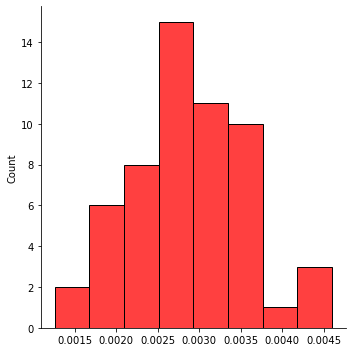

In [17]:
# All proportions

sns.displot(data=z, color="red")

------------------

# Full factorial Experiment

In [18]:
df2 = pd.read_excel("D:\PGDBA Backup\ISI\AB-Inference\Assignments\Datasets\Full Factorial Experiment on Conversion of Customers.xlsx")

In [19]:
df2.head()

,Sr. No.,A,B,C,Number Converted,Number Not Converted,Total
0,1,1,1,1,3809,28265,32074
1,2,1,1,2,3866,28217,32083
2,3,1,1,3,3881,27770,31651
3,4,1,2,1,3954,28421,32375
4,5,1,2,2,3888,28298,32186


In [20]:
df2.describe()

,Sr. No.,A,B,C,Number Converted,Number Not Converted,Total
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,9.500000,1.500000,2.000000,2.000000,3866.055556,28205.000000,32071.055556
std,5.338539,0.514496,0.840168,0.840168,57.296414,195.629602,213.902527
min,1.000000,1.000000,1.000000,1.000000,3737.000000,27770.000000,31571.000000
25%,5.250000,1.000000,1.000000,1.000000,3836.250000,28155.750000,32034.750000
50%,9.500000,1.500000,2.000000,2.000000,3860.500000,28245.000000,32107.500000
75%,13.750000,2.000000,3.000000,3.000000,3894.000000,28321.000000,32190.500000
max,18.000000,2.000000,3.000000,3.000000,3989.000000,28526.000000,32375.000000


In [21]:
df2[df2["A"] == 1]
df2[df2["A"] == 2]
df2[df2["B"] == 1]
df2[df2["B"] == 2]
df2[df2["B"] == 3]
df2[df2["C"] == 1]
df2[df2["C"] == 2]
df2[df2["C"] == 3]

,Sr. No.,A,B,C,Number Converted,Number Not Converted,Total
2,3,1,1,3,3881,27770,31651
5,6,1,2,3,3737,27834,31571
8,9,1,3,3,3854,27919,31773
11,12,2,1,3,3885,28173,32058
14,15,2,2,3,3896,28225,32121
17,18,2,3,3,3852,28175,32027


In [22]:
df2[df2["A"] == 1]

,Sr. No.,A,B,C,Number Converted,Number Not Converted,Total
0,1,1,1,1,3809,28265,32074
1,2,1,1,2,3866,28217,32083
2,3,1,1,3,3881,27770,31651
3,4,1,2,1,3954,28421,32375
4,5,1,2,2,3888,28298,32186
5,6,1,2,3,3737,27834,31571
6,7,1,3,1,3896,28296,32192
7,8,1,3,2,3855,28339,32194
8,9,1,3,3,3854,27919,31773


In [23]:
A1 = df2[df2["A"] == 1]

A_1_converted = df2[df2["A"] == 1]["Number Converted"].sum()
A_1_not_converted = df2[df2["A"] == 1]["Number Not Converted"].sum()

A_2_converted = df2[df2["A"] == 2]["Number Converted"].sum()
A_2_not_converted = df2[df2["A"] == 2]["Number Not Converted"].sum()

B_1_converted = df2[df2["B"] == 1]["Number Converted"].sum()
B_1_not_converted = df2[df2["B"] == 1]["Number Not Converted"].sum()

B_2_converted = df2[df2["B"] == 2]["Number Converted"].sum()
B_2_not_converted = df2[df2["B"] == 2]["Number Not Converted"].sum()

B_3_converted = df2[df2["B"] == 3]["Number Converted"].sum()
B_3_not_converted = df2[df2["B"] == 3]["Number Not Converted"].sum()


C_1_converted = df2[df2["C"] == 1]["Number Converted"].sum()
C_1_not_converted = df2[df2["C"] == 1]["Number Not Converted"].sum()

C_2_converted = df2[df2["C"] == 2]["Number Converted"].sum()
C_2_not_converted = df2[df2["C"] == 2]["Number Not Converted"].sum()

C_3_converted = df2[df2["C"] == 3]["Number Converted"].sum()
C_3_not_converted = df2[df2["C"] == 3]["Number Not Converted"].sum()


In [24]:
print("A_1_converted: ",A_1_converted)
print("A_1_not_converted: ",A_1_not_converted)

print("A_2_converted: ",A_2_converted)
print("A_2_not_converted: ",A_2_not_converted)


print("B_1_converted: ",B_1_converted)
print("B_1_not_converted: ",B_1_not_converted)

print("B_2_converted: ",B_2_converted)
print("B_2_not_converted: ",B_2_not_converted)

print("B_3_converted: ",B_3_converted)
print("B_3_not_converted: ",B_3_not_converted)


print("C_1_converted: ",C_1_converted)
print("C_1_not_converted: ",C_1_not_converted)

print("C_2_converted: ",C_2_converted)
print("C_2_not_converted: ",C_2_not_converted)

print("C_3_converted: ",C_3_converted)
print("C_3_not_converted: ",C_3_not_converted)


A_1_converted:  34740
A_1_not_converted:  253359
A_2_converted:  34849
A_2_not_converted:  254331
B_1_converted:  23127
B_1_not_converted:  168902
B_2_converted:  23268
B_2_not_converted:  169200
B_3_converted:  23194
B_3_not_converted:  169588
C_1_converted:  23234
C_1_not_converted:  169768
C_2_converted:  23250
C_2_not_converted:  169826
C_3_converted:  23105
C_3_not_converted:  168096
